![banner](https://mindspore.cn/static/img/logo_black.74c3909e.png)

# 旋转门

首先我们需要给出以矩阵作为指数的自然指数函数的定义：
$$e^A \equiv I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots$$

**引理：** 如果 $A^2 = I$，那么有 
$$e^{i\theta A} = \cos\theta I + i\sin\theta A$$

**Proof：**

$$ \begin{align*} e^{i\theta A}  & = I + i\theta A + \frac{1}{2!}(i\theta A)^2  + \frac{1}{3!}(i\theta A)^3 + \frac{1}{4!}(i\theta A)^4 + \cdots \\ & = I + i\theta A - \frac{1}{2!}\theta^2 I  - \frac{1}{3!}i\theta^3 A + \frac{1}{4!}\theta^4 I + \cdots \\ & = \left( 1 - \frac{1}{2!}\theta^2 + \frac{1}{4!}\theta^4 - \cdots \right)I   + \left(\theta - \frac{1}{3!}\theta^3 + \frac{1}{5!}\theta^5 - \cdots \right)iA \\ & = \cos\theta I + i\sin\theta A \end{align*} $$

下面给出三个旋转门：
$$
\begin{align*}
R_x(\theta) & \equiv e^{-i{\theta\over 2} X} = \cos{\theta\over 2}I - i\sin{\theta\over 2} X\\
R_y(\theta) & \equiv e^{-i{\theta\over 2} Y} = \cos{\theta\over 2}I - i\sin{\theta\over 2} Y\\
R_z(\theta) & \equiv e^{-i{\theta\over 2} Z} = \cos{\theta\over 2}I - i\sin{\theta\over 2} Z\\
\end{align*}
$$

$R_x(\theta)$ 表示在Bloch球中，以 $x$ 轴为旋转轴，以右手法则确定旋转方向，旋转 $\theta$ 角度，$R_y$ 和 $R_z$ 同理。

更一般的，如果以 $\vec{n}$ 为轴旋转 $\theta$ 角度，那么旋转算子为
$$R_{\vec{n}}(\theta) \equiv e^{-i(\theta / 2) n \cdot \sigma} = \cos{\theta\over 2}I - i\sin{\theta\over 2} \vec{n}\cdot \vec{\sigma}$$
其中 $\vec{n} = (n_x, n_y, n_z) \in \mathbb{R}^3, n_x^2 + n_y^2 + n_z^2 = 1$，$\vec{\sigma} = (\sigma_1, \sigma_2, \sigma_3) = (X, Y, Z)$。

该旋转算子可以生成任意的单量子比特旋转$U$（相差一个全局相位）。从某种意义上说，给定任何的$U$，人们总是可以选择角度$\theta$和旋转轴$\hat{n}$，使得
$$
U=e^{i\alpha}R_n(\theta)
$$

**Lemma：** $\vec{n}\cdot \vec{\sigma}$ 的特征值是 $\pm 1$.

**Proof：** 

$$
\begin{align*}
\vec{n}\cdot \vec{\sigma}
& = n_x X + n_y Y + n_z Z \\
& = 
\begin{pmatrix} 
0 & n_x \\
n_x & 0 \\
\end{pmatrix} + 
\begin{pmatrix} 
0 & -i n_y \\
i n_y & 0 \\
\end{pmatrix} + 
\begin{pmatrix} 
n_z & 0 \\
0 & n_z \\
\end{pmatrix} \\
& = \begin{pmatrix} 
n_z & n_x-i n_y \\
n_x+ i n_y & -n_z \\
\end{pmatrix} \\
\\
\det\left(\vec{n}\cdot \vec{\sigma} - \lambda I\right)
& = \begin{vmatrix} 
        n_z - \lambda & n_x - i n_y \\
        n_x + i n_y & -n_z - \lambda
    \end{vmatrix} \\
& = \lambda^2 - n_x^2 - n_y^2 - n_z^2 \\
& = \lambda^2 - 1
\end{align*}
$$

**Theorem：** $R_{\vec{n}}(\theta)$ 的作用效果是在Bloch球中以 $\vec{n}$ 为轴旋转 $\theta$ 。

**Proof：**

因为 $\vec{n} \cdot \vec{\sigma}$ 的特征值是 $\pm 1$，不妨设 $+1$ 对应的特征向量是 $|a\rangle$，$-1$ 对应的特征向量是 $|b\rangle$，那么根据*谱分解*定理，我们有
$$\vec{n} \cdot \vec{\sigma} = \sum_i \lambda_i |i\rangle \langle i| = |a\rangle \langle a| - |b\rangle \langle b|$$

对于任意单位向量 $|\psi\rangle$，将其用 $\lbrace |a\rangle, |b\rangle\rbrace$ 这一组基表示，忽略全局相位
$$
\begin{align*}
|\psi\rangle 
& = \alpha |a\rangle + \beta |b\rangle \\
& = \cos{\theta\over 2} |a\rangle + e^{i\phi} \sin{\theta\over 2} |b\rangle
\end{align*}
$$

考虑 $R_{\vec{n}}(\theta)$ 的作用效果：
$$
\begin{align*}
R_{\vec{n}}(\theta) 
& = \cos{\theta\over 2}I - i\sin{\theta\over 2} \vec{n}\cdot \vec{\sigma} \\
& = \cos{\theta\over 2}\left( |a\rangle \langle a| + |b\rangle \langle b| \right) - i\sin{\theta\over 2} \left( |a\rangle \langle a| - |b\rangle \langle b| \right) \\
& = \left( \cos{\theta\over 2} - i\sin{\theta\over 2} \right) |a\rangle \langle a| + \left( \cos{\theta\over 2} + i\sin{\theta\over 2} \right) |b\rangle \langle b| \\
& = e^{-i \frac{\theta}{2}} |a\rangle \langle a| + e^{i\frac{\theta}{2}} |b\rangle \langle b| \\
& = e^{-i \frac{\theta}{2}} \left( |a\rangle \langle a| + e^{i\theta}|b\rangle \langle b| \right)
\end{align*}
$$

因此作用后的向量 $|\psi'\rangle$ 
$$
\begin{align*}
|\psi'\rangle 
& = R_{\vec{n}}(\alpha) |\psi\rangle \\
& = e^{-i \frac{\alpha}{2}} \left( \cos{\theta\over 2} |a\rangle \langle a| + e^{i(\phi + \alpha)} \sin{\theta\over 2} |b\rangle \langle b| \right)
\end{align*}
$$

忽略掉全局相位，在Bloch球中，以 $|a\rangle, |b\rangle$ 为轴，旋转 $\alpha$ 角度。

下面我们来使用mindquantum来验证一下旋转效果。

首先我们构建一个线路来实现输入 $\theta, \phi$ 输出对应的量子态，显然可以从 $|0\rangle$ 通过两个旋转来实现。

In [1]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import RX, RZ, RY
import numpy as np

circ = Circuit()
circ += RY("theta").on(0)
circ += RZ("phi").on(0)
circ.svg()

> API 解释：
> 
> - `RX`、`RY`、`RZ` 是常用的单比特旋转门，使用方法是 `RX(name/val).on(q)`，表示声名一个作用在 `q` 上的 $R_x$ 门，如果参数是字符串 `name` 则生成一个含参量子门；如果参数是数值 `val` 则生成一个具体的量子门。在 MindQuantum 中只要两个参数名是相同的就表示同一个参数。

我们可以验证一下，$\theta = \frac{\pi}{4}, \phi = 0$ 的点的坐标应该是 $(\frac{1}{\sqrt{2}}, 0, \frac{1}{\sqrt{2}})$

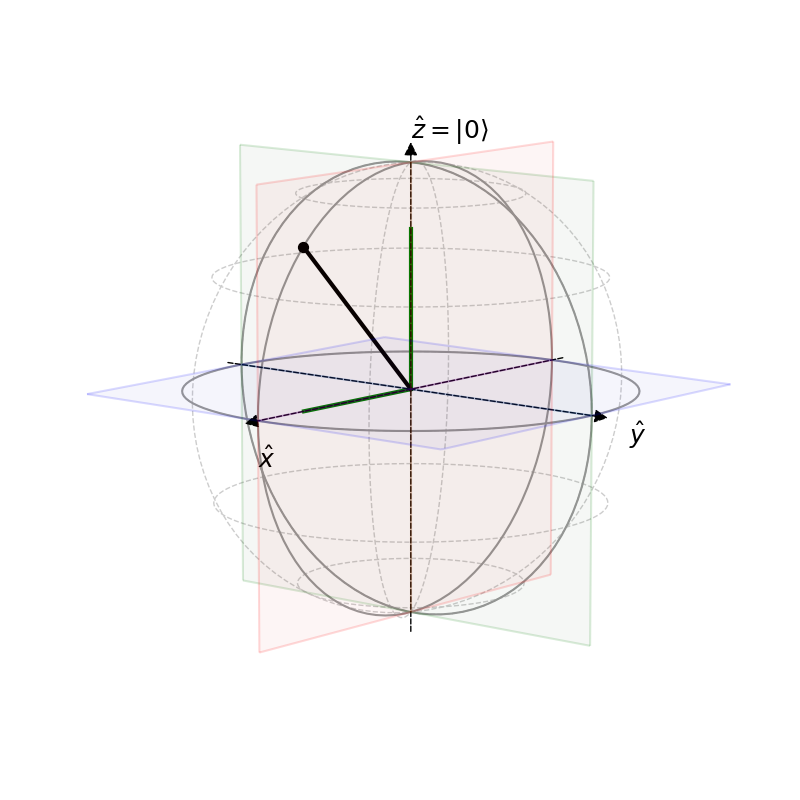

In [2]:
from mindquantum.io.display import BlochScene
import matplotlib.pyplot as plt

%matplotlib widget

state1 = circ.get_qs(pr={"theta" : np.pi / 4, "phi" : 0})

scene = BlochScene()
fig, ax = scene.create_scene()
state1_obj = scene.add_state(ax, state1)
plt.show()

> API 解释：
> 
> - 对于含参量子线路，作用时需要传入具体的参数值。在 MindQuantum 中使用参数解析器 [ParameterResolver](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.core.parameterresolver.html)，可以使用一个字典声名一个参数解析器，字典的结构是 `{name: value}` ；
> - 对于量子线路也可以调用 `circ.get_qs()`，表示将该线路作用在 $|0\rangle$ 上的结果。

现在将它绕 $z$ 轴旋转 $\pi \over 3$，旋转后的 $\theta' = 
\frac{\pi}{4}, \phi' = \frac{\pi}{3}$，旋转后的坐标为 $(\cos{\frac{\pi}{3}}\sin\frac{\pi}{4}, \sin\frac{\pi}{3}\sin\frac{\pi}{4}, \cos\frac{\pi}{4})$ 。

/Users/jedzhou/opt/anaconda3/envs/mq/lib/python3.8/site-packages/mindquantum/io/display/bloch_plt_drawer.py:530: UserWarning: jupyter environment detected, if animation not work, please install ipympl with '!pip install ipympl' in jupyter notebook and run '%matplotlib ipympl' in cell.
  warnings.warn(


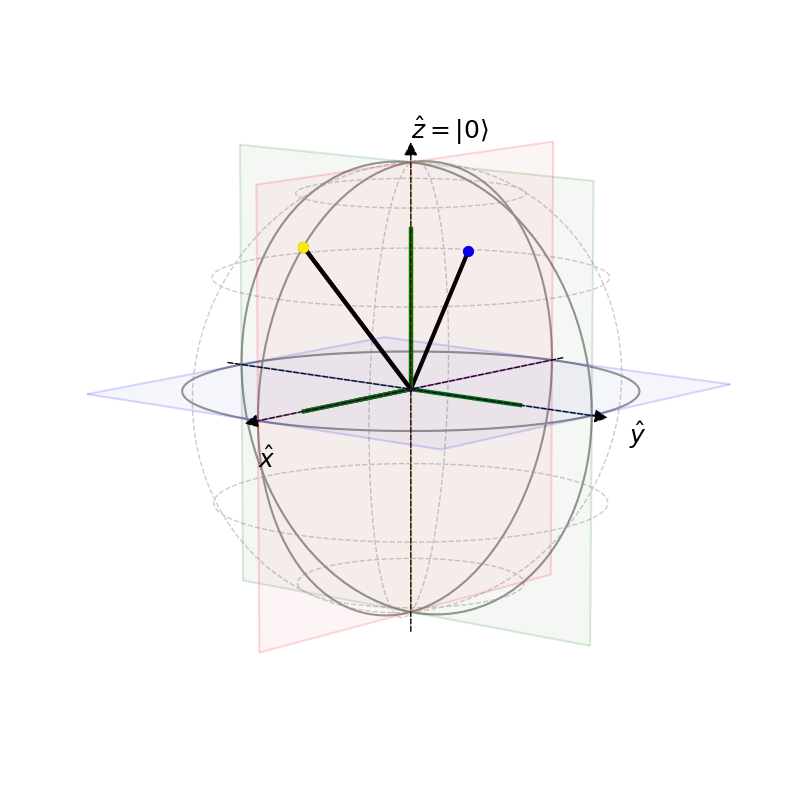

In [3]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import RX, RZ
from mindquantum.io.display import BlochScene
import numpy as np

%matplotlib widget

t = np.linspace(0, 1, num=100)  # 时间片
arr_theta = np.pi / 4 + 0 * t   # 每个时间点的 theta
arr_phi = np.pi / 3 * t         # 每个时间点的 phi
states = []                     # 存储每个时间点的 state
for theta, phi in zip(arr_theta, arr_phi):
    states.append(circ.get_qs(pr={"theta": theta, "phi": phi}))
states = np.array(states)

scene = BlochScene()
fig, ax = scene.create_scene()

# 先把 start 和 end 两个点画出来
start = circ.get_qs(pr={"theta": np.pi / 4, "phi": 0})
end = circ.get_qs(pr={"theta": np.pi / 4, "phi": np.pi / 3})
scene.add_state(ax, start, pointcolor="red")
scene.add_state(ax, end, pointcolor="blue")

# 生成动画
state_obj = scene.add_state(ax, states[0], pointcolor="yellow")
anim = scene.animation(fig, ax, state_obj, states)


![rotate](./images/rotate.gif)

> API 解释：
> 
> - `scene.add_state` 添加一个点；
> - `scene.animation` 生成动画，需要把每个时间点的 `state` 数组传入。
> 
> Bloch 球的颜色等许多参数都可以调节，详细 API 参照 [mindquantum.io](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.io.html) 。

## 旋转门的性质（以$R_z$门为例）

$R_z$门有以下几个特性：
$$
X R_{z}(\theta) X=R_{z}(-\theta)=R_{z}(\theta)^{-1}=R_{z}(\theta)^{\dagger}
$$
最后的关系式来源于$R_z(\theta)$的幺正性。验证一下，$(Z^\dagger=Z)$
$$
R_{z}(\theta)^{\dagger}=I \cos \frac{\theta}{2}+i Z \sin \frac{\theta}{2}=e^{i \theta Z / 2}
$$
第一个关系式也是正确的，有如下两种方式验证：

1. 直接的办法，已知$R_{z}(\theta)(\alpha|0\rangle+\beta|1\rangle)=\alpha e^{-i \theta / 2}|0\rangle+\beta e^{i \theta / 2}|1\rangle$，则有
$$
\begin{aligned}
X R_{z}(\theta) X(\alpha|0\rangle+\beta|1\rangle) &=X R_{z}(\theta)(\alpha|1\rangle+\beta|0\rangle) \\
&=X\left(\alpha e^{i \theta / 2}|1\rangle+\beta e^{-i \theta / 2}|0\rangle\right) \\
&=\alpha e^{i \theta / 2}|0\rangle+\beta e^{-i \theta / 2}|1\rangle
\end{aligned}
$$
然后与$R_{z}(-\theta)(\alpha|0\rangle+\beta|1\rangle)=\alpha e^{i \theta / 2}|0\rangle+\beta e^{-i \theta / 2}|1\rangle$比较。

2. “更好”的方法可能是：
$$
X R_{z}(\theta) X=X I X \cos \frac{\theta}{2}-i X Z X \sin \frac{\theta}{2}=I \cos \frac{\theta}{2}+i Z \sin \frac{\theta}{2}
$$
因为我们知道$X Z X=-Z $，或 $ Z X+X Z=0 $ 亦或 $ X Z=-X Z$（对于任何泡利矩阵的组合都成立）

**Figure from wikipedia**

![commutative_relation](images/commutative_relation.png)

- 注意到$XY-YX=2iZ$，这意味着$XY=iZ$。两个不同的泡利矩阵相乘与第三个泡利矩阵成正比。
- 现在让我们在 MindQuantum 中验证上述性质，我们随便选取一个$\theta$的值，然后观察$X R_{z}(\theta) X$、$R_{z}(-\theta)$、$R_{z}(\theta)^{-1}$和$R_{z}(\theta)^{\dagger}$作用在$|0\rangle$态上的结果是否相同。


In [4]:
from mindquantum.core.gates import RZ, X
from mindquantum.core.circuit import Circuit

theta = 1

# X Rz(𝜃) X
circ = Circuit()
circ += X.on(0)
circ += RZ(theta).on(0)
circ += X.on(0)
print(circ)
print(circ.get_qs(ket=True))

q0: ──X────RZ(1)────X──
(0.8775825618903728+0.479425538604203j)¦0⟩


In [5]:
# Rz(-𝜃)
circ2 = Circuit()
circ2 += RZ(-theta).on(0)
print(circ2)
print(circ2.get_qs(ket=True))

q0: ──RZ(-1)──
(0.8775825618903728+0.479425538604203j)¦0⟩


In [6]:
# inverse of Rz(𝜃)
from mindquantum.core.gates import Power
circ3 = Circuit()
circ3 += Power(RZ(theta), -1).on(0)
print(circ3)
print(circ3.get_qs(ket=True))

q0: ──RZ(1)^-1──
(0.8775825618903726+0.47942553860420295j)¦0⟩


In [7]:
# Rz(𝜃) with dagger
circ4 = Circuit()
circ4 += RZ(theta).hermitian().on(0)
print(circ4)
print(circ4.get_qs(ket=True))

q0: ──RZ(-1)──
(0.8775825618903728+0.479425538604203j)¦0⟩


可以看到四种方式得到的线路末态完全一致。

In [8]:
from show_info import InfoTable

InfoTable('mindquantum')

Software,Version
mindquantum,0.9.0
System,Info
Python,3.8.13
OS,Darwin x86_64
Memory,34.36 GB
CPU Max Thread,16
Date,Wed Jun 7 20:32:51 2023


# 习题

## Exercise 1

写出 $R_x(\theta), R_y(\theta), R_z(\theta)$ 的矩阵形式。

## Exercise 2

证明 $XR_y(\theta)X = R_y(-\theta)$

## Exercise 3（选做）

证明如下等式成立：
$$
e^{-i(\theta / 2) n \cdot \sigma}=c_{\theta} I-i s_{\theta}(n \cdot \sigma)
$$
其中$n\cdot\sigma\equiv n_x X+n_y Y+n_z Z$，且$n_x^2+n_y^2+n_z^2=1$。

## Exercise 4（选做）

证明：给定任意的$U$，人们总是可以选择角度$\theta$和旋转轴$\hat{n}$，使得
$$
U=e^{i\alpha}R_n(\theta)
$$